# 4. Data Preparation 



In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import sqlite3

## 4.1 Reading the Data

In [2]:
#reading the movie_budget dataset 
tn_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv")
tn_movie_budgets .head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#reading the rt.reviews dataset
rt_reviews = pd.read_csv("data/rt.reviews.tsv", sep='\t', encoding ='latin-1')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
#reading the tmdb.movies dataset
tmdb_movies = pd.read_csv("data/tmdb.movies.csv")
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Reading the im.db database

In [5]:
conn = sqlite3.connect("data/im.db")
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table' ;"""
pd.read_sql(table_name_query, conn)


,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## 4.2 Data Exploration

### Exploring the tn_movie_budget dataset

In [6]:
#this prints the overview information of the dataset
tn_movie_budgets.info()
#this prints the number of rows and columns in the dataset
print(tn_movie_budgets.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
(5782, 6)


In [7]:
# Descreptive Analysis on Numeric features
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [8]:
#checking for duplicates
print("Number of duplicates is ", tn_movie_budgets.duplicated().sum())

#checking for missing values
print("Missing values in the dataset")
print(tn_movie_budgets.isna().sum())

Number of duplicates is  0
Missing values in the dataset
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Exploring the rt_reviews dataset

In [9]:
#this gives the overview  information of the dataset
rt_reviews.info()
#this gives the numbers of rows and columns in the dataset
print(rt_reviews.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
(54432, 8)


In [10]:
# Descreptive Analysis on Numeric features
rt_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [11]:
#checking for duplicates
print("number of duplicates in the data", rt_reviews.duplicated().sum())

#checking for missing values
print( "missing values in the dataset")
print(rt_reviews.isna().sum())

number of duplicates in the data 9
missing values in the dataset
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


## Exploring the tmdb.movies dataset

In [12]:
#this gives the overview  information of the dataset
tmdb_movies.info()
#this gives the numbers of rows and columns in the dataset
print(tmdb_movies.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
(26517, 10)


In [13]:
# Descreptive Analysis on Numeric features
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [14]:
#checking for duplicates
print("number of duplicates in the data", tmdb_movies.duplicated().sum())

#checking for missing values
print( "missing values in the dataset")
print(tmdb_movies.isna().sum())

number of duplicates in the data 0
missing values in the dataset
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


## Exploring the im.db database
We will focus on the movie_ratings and movie_basics tables. To make use of all available information together, we will merge the two tables togethert firstExploring the im.db database

In [15]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics """, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
directors = pd.read_sql("""SELECT * FROM directors """, conn)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [17]:
known_for = pd.read_sql("""SELECT * FROM known_for """, conn)
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [18]:
movie_akas = pd.read_sql("""SELECT * FROM movie_akas """, conn)
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [19]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings """, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## merging the movie basics and movies ratings datasets

In [20]:
movie_basics_and_ratings = pd.merge(movie_basics, movie_ratings, on='movie_id')
movie_basics_and_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [21]:
# get preview of info
movie_basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [22]:
# check for missing values
movie_basics_and_ratings.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [23]:
# summary stats
movie_basics_and_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [24]:
movie_basics_and_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [25]:
combined_data_with_budget = movie_basics_and_ratings.merge(tn_movie_budgets, how="inner", left_on="primary_title", right_on="movie")
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


# 5. Data Cleaning

### 5.1 Cleaning the rt_review dataset
We observed that there are 9 duplicates in our dataset. Moreover, there are 13517 missing values in the rating column and we decided to drop them in both cases to maintain the integrity of the dataset.

In [24]:
# Drop duplicates based on 'rating' column
rt_reviews = rt_reviews.drop_duplicates(subset=['rating'])

In [25]:
# droping missing values in rating columns
# some non-numeric values in the rating column that cannot be converted to float, such as ‘C’. To handle this, you can filter out these invalid values before applying the conversion function.
def is_valid_rating(rating):
    try:
        float(rating)
        return True
    except ValueError:
        if '/' in rating:
            num, denom = rating.split('/')
            try:
                float(num) / float(denom)
                return True
            except ValueError:
                return False
        return False

rt_reviews = rt_reviews[rt_reviews['rating'].apply(is_valid_rating)]
#convert all to string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
#define the conversion function
def convert_rating(rating):
    if '/' in rating:
        num, denom = rating.split('/')
        return float(num) / float(denom) * 10  # Assuming ratings are out of 10
    return float(rating)
rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)
rt_reviews.dropna(subset=['rating'], inplace=True)

# 6. Explanatory Data Analysis

## rt. review dataset
We plotted a bar graph for the top 20 publishers against average ratings and observed that the publishers have different ratings

In [26]:
rt_reviews=rt_reviews.nlargest (n=50, columns='rating')
rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
35830,1393,...the kind of film that Menahem Golan and Yor...,15.000000,rotten,John Noonan,0,FILMINK (Australia),"November 10, 2016"
5217,196,NaN,12.500000,fresh,NaN,0,Hollywood.com,"April 23, 2005"
10535,401,Spielberg marshals all his formidable storytel...,11.000000,fresh,Marjorie Baumgarten,0,Austin Chronicle,"January 1, 2000"
882,23,"On the plus side of the ledger, Russell enable...",10.500000,fresh,Leonard Maltin,0,leonardmaltin.com,"December 13, 2013"
19,3,A black comedy as dry and deadpan as a bleache...,10.000000,fresh,John Beifuss,0,"Commercial Appeal (Memphis, TN)","September 10, 2012"
40,3,Cosmopolis is an investment that pays off enor...,10.000000,fresh,Peter Sobczynski,0,eFilmCritic.com,"August 24, 2012"
765,23,"Grand Performances move ""Hustle",10.000000,fresh,Charles Koplinski,0,Illinois Times,"January 6, 2014"
1803,57,A unique dramedy that stands heads and shoulde...,10.000000,fresh,John Hanlon,0,John Hanlon Reviews,"June 30, 2013"
29217,1162,"... mix of scattershot humor, battlefield carn...",10.000000,fresh,Glenn Lovell,0,CinemaDope,"March 6, 2016"
48882,1822,"Yet another captivating, heartfelt, provocativ...",9.800000,fresh,Avi Offer,0,NYC Movie Guru,"July 8, 2011"


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


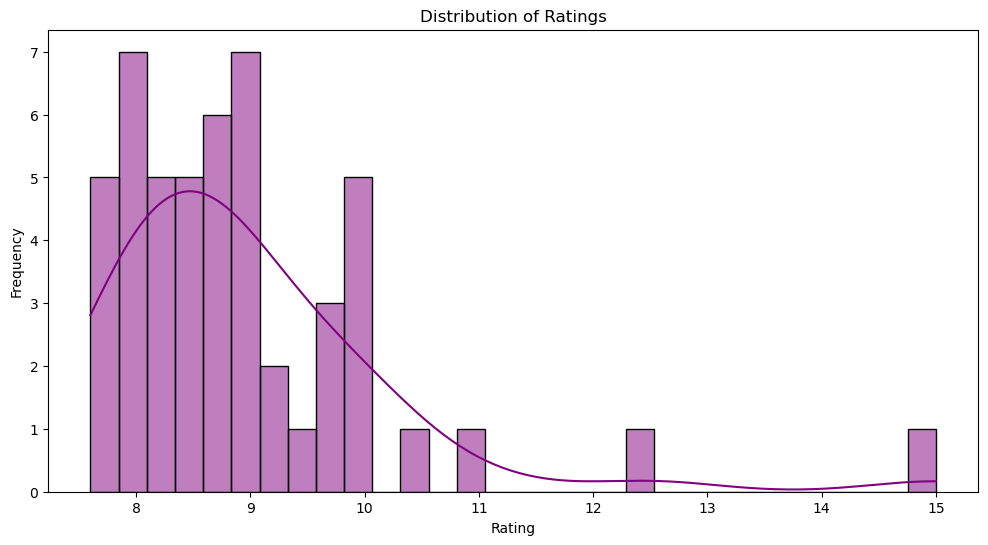

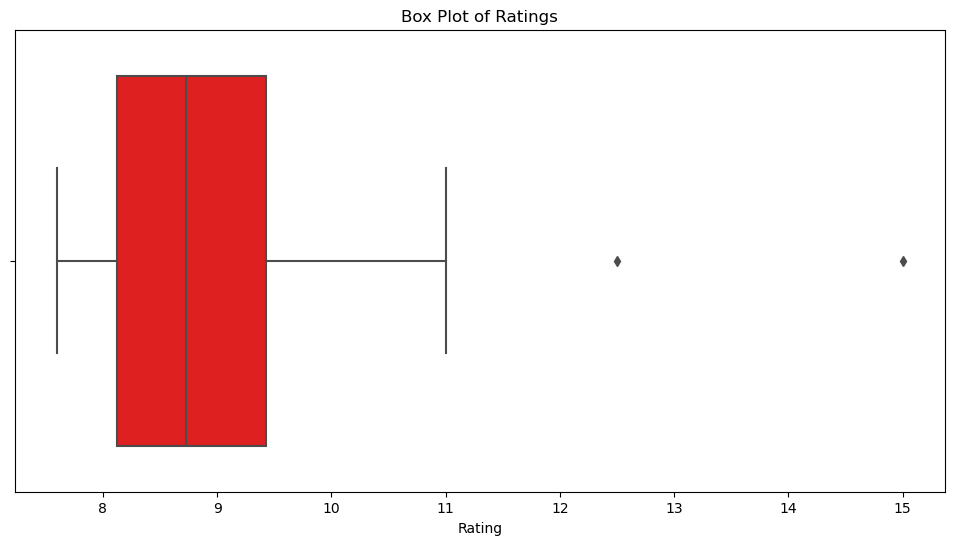

In [27]:
#checking the distribution of ratings
# Plot histogram for rating using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(rt_reviews['rating'], bins=30, kde=True, color='purple')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Plot box plot for rating using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x=rt_reviews['rating'], color='red')
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

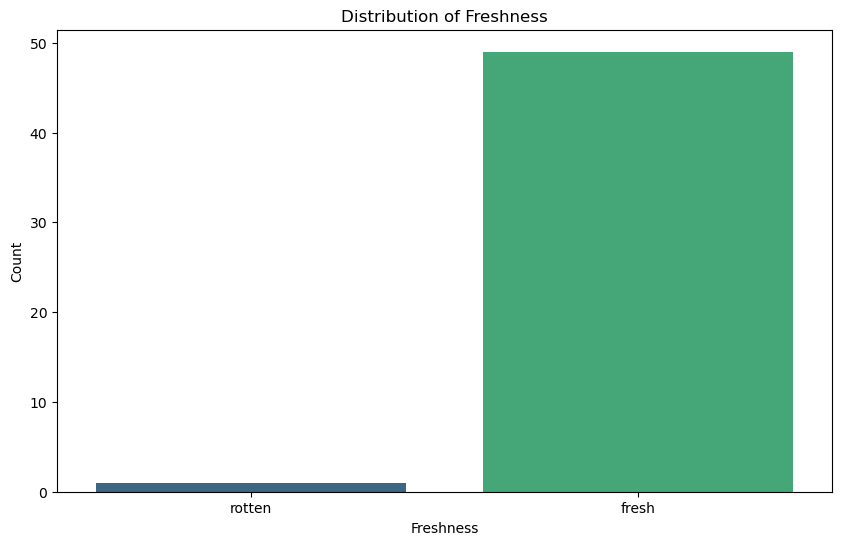

In [28]:
#checking the distribution of fresh 
plt.figure(figsize=(10, 6))
sns.countplot(x='fresh', data=rt_reviews, palette='viridis')
plt.xlabel('Freshness')
plt.ylabel('Count')
plt.title('Distribution of Freshness')
plt.show()


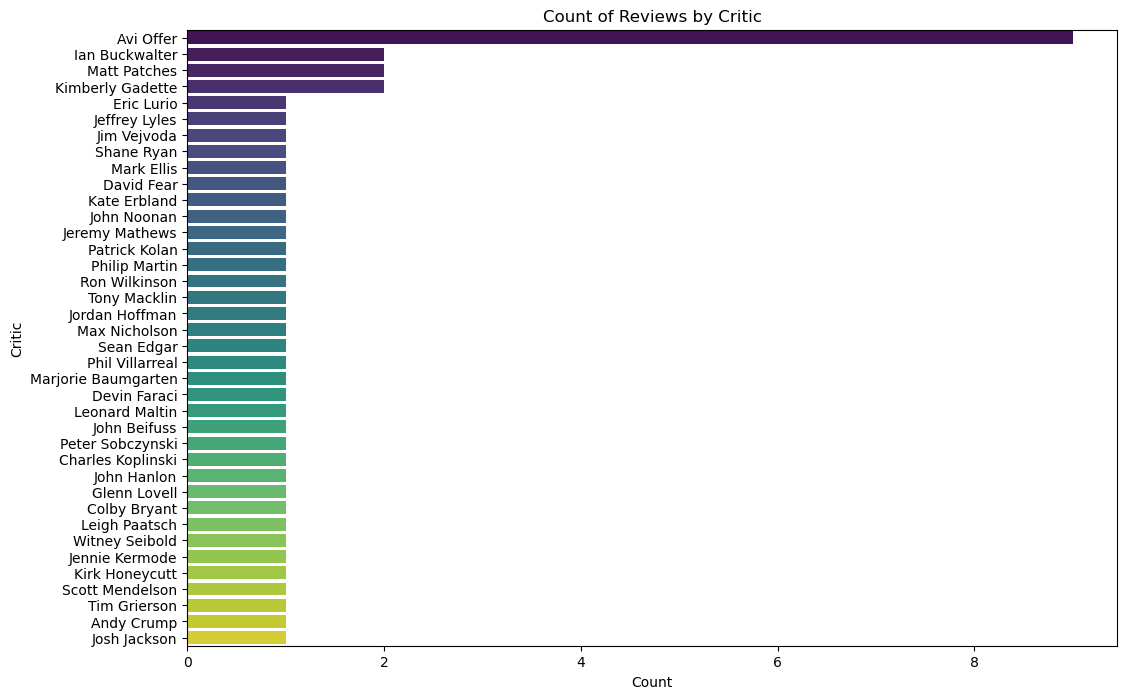

In [29]:
#checking the distribution of critic
plt.figure(figsize=(12, 8))
sns.countplot(y='critic', data=rt_reviews, palette='viridis', order=rt_reviews['critic'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Critic')
plt.title('Count of Reviews by Critic')
plt.show()

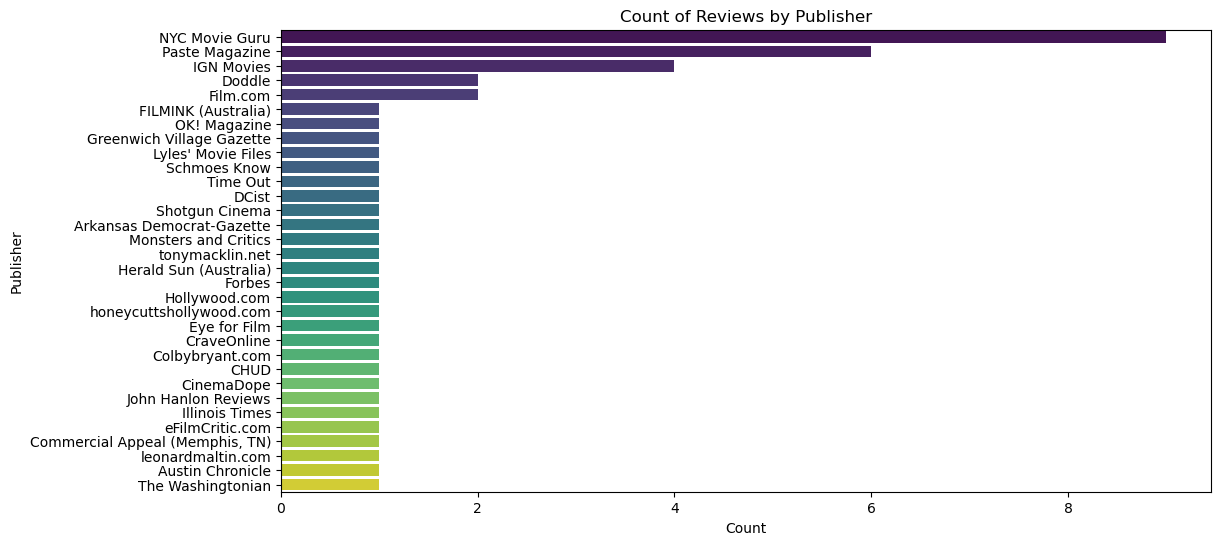

In [30]:
#checking the distribution of publishers
plt.figure(figsize=(12, 6))
sns.countplot(y='publisher', data=rt_reviews, palette='viridis', order=rt_reviews['publisher'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('Count of Reviews by Publisher')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


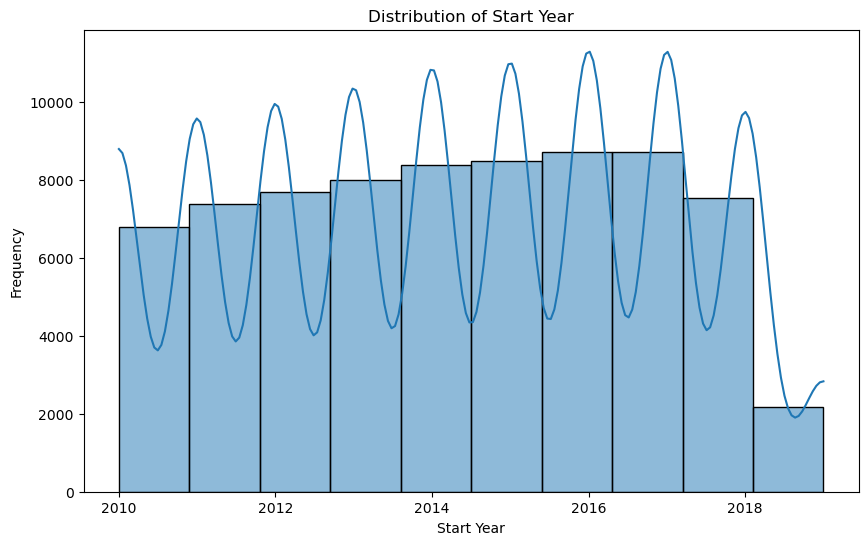

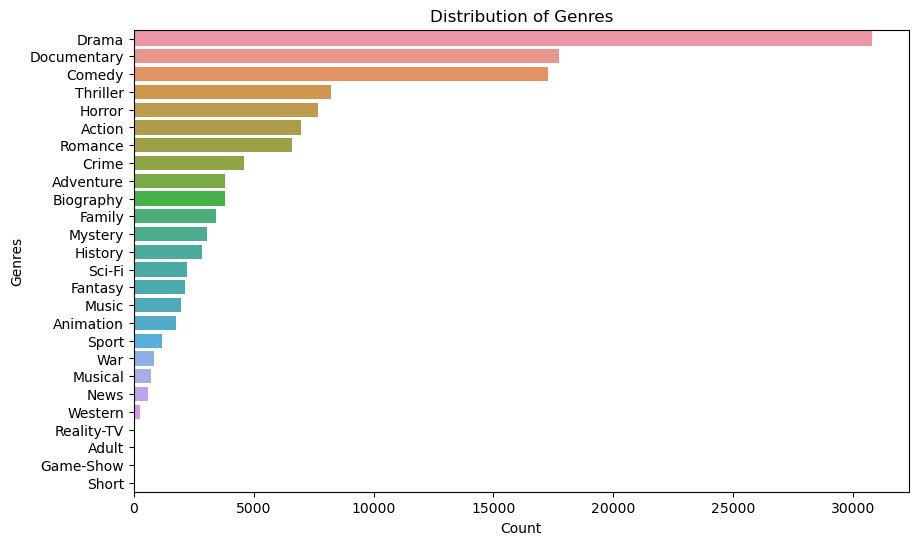

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


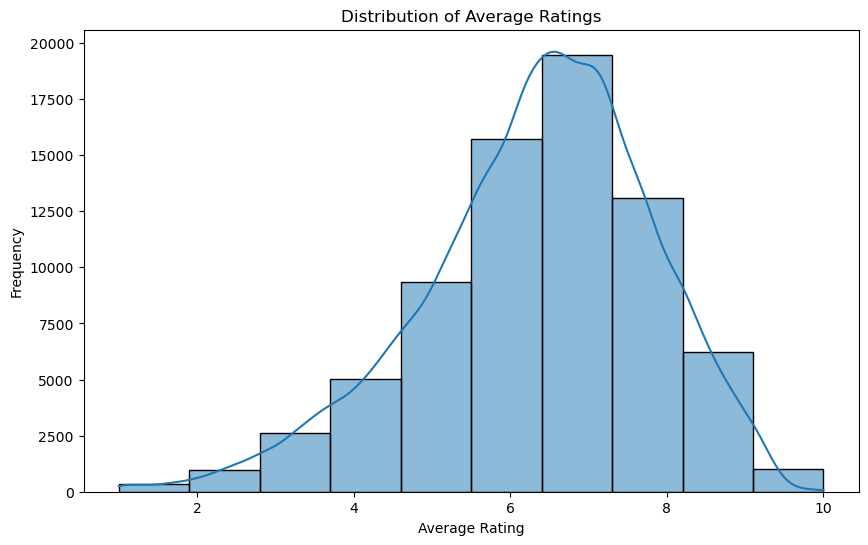

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


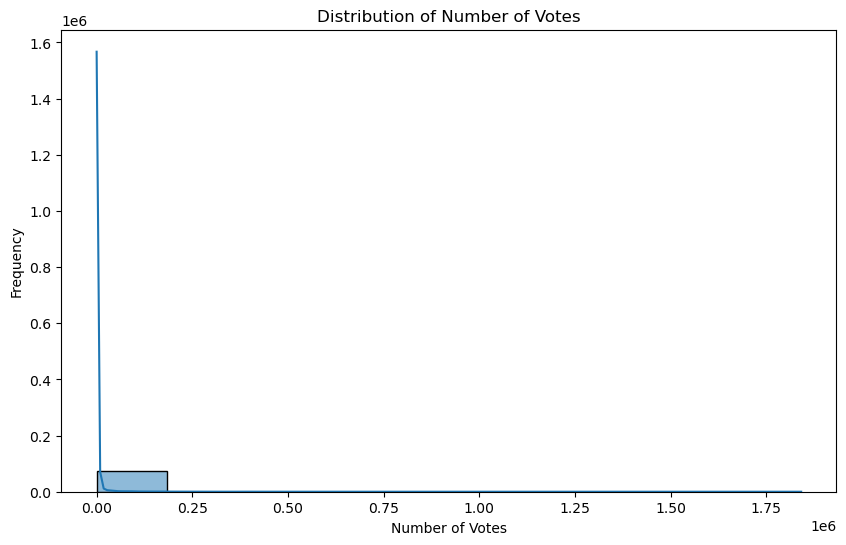

In [31]:

# Distribution of start_year
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['start_year'], bins=10, kde=True)
plt.title('Distribution of Start Year')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()
# Distribution of genres
plt.figure(figsize=(10, 6))
genres_exploded = merged_data['genres'].str.split(',').explode()
sns.countplot(y=genres_exploded, order=genres_exploded.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()
# Distribution of averagerating
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['averagerating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()
# Distribution of numvotes
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['numvotes'], bins=10, kde=True)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

From the distributions, we can say that the drama Genre is the most  widely distributed followed by Documentary and Comedy
Thrillers, horror, action, and romance are all averagely distributed while Musical, News and Reality are lowely distributed whereas Adult and Game shows have not distributed completely

# Question 2 : Which movie genres have been the most popular and successful over time?
   * What are the trends in genre preferences?
   * What are the preferences of the target audience based on user ratings and reviews?
   * What type of content resonates well with the audience?

To answer these question we look at the im.db datase and the rt_reviews dataset

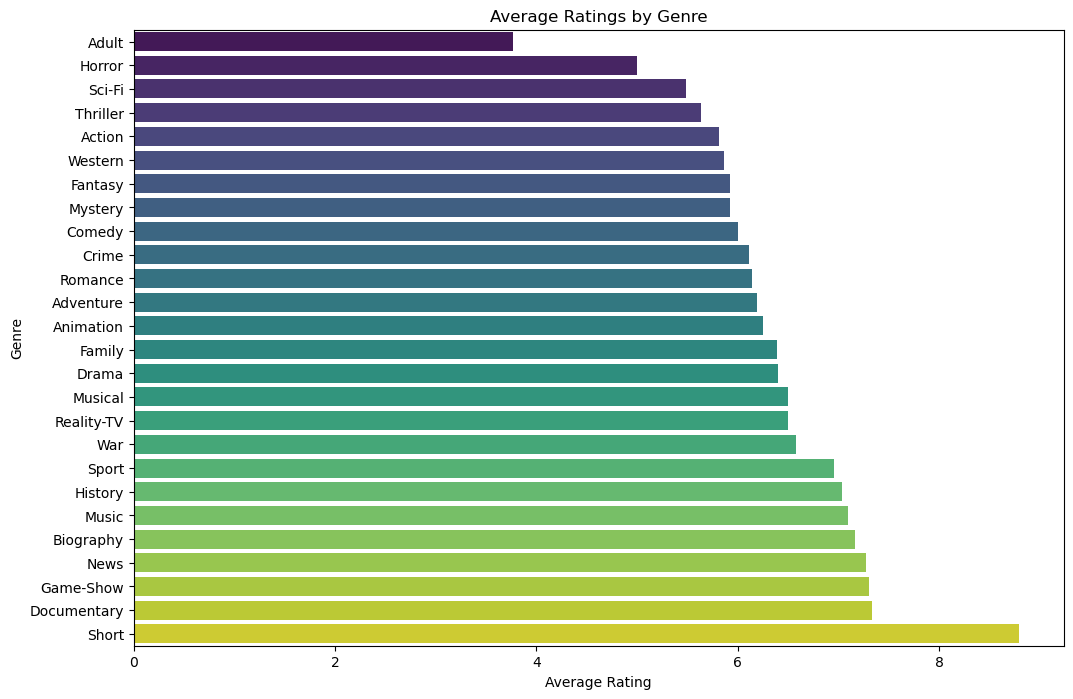

In [28]:
# Exploding genres to handle multiple genres per movie
merged_data_exploded = movie_basics_and_ratings.assign(genres=movie_basics_and_ratings['genres'].str.split(',')).explode('genres')

# Calculating the average rating for each genre
genre_avg_rating = merged_data_exploded.groupby('genres')['averagerating'].mean().reset_index()

# Sorting the DataFrame by average rating in ascending order
genre_avg_rating = genre_avg_rating.sort_values(by='averagerating', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='averagerating', y='genres', data=genre_avg_rating, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

short movie genre has the highest average rating , Biography,News,Musical and History have almost the same rating while Adult and horror have th 

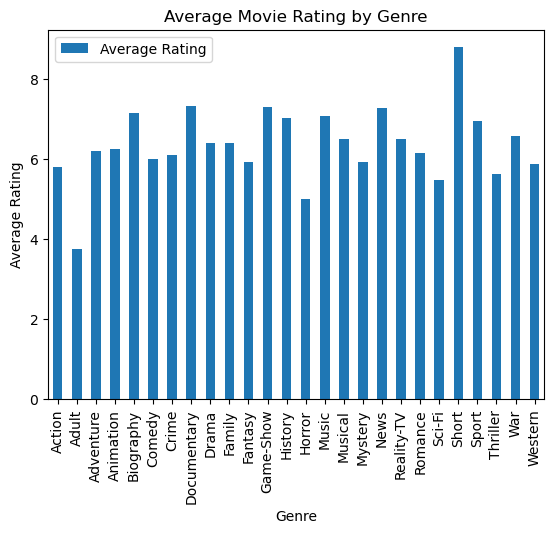

In [30]:
#plotting genre against avaragerating

# Drop rows with missing genres
movie_basics_and_ratings = movie_basics_and_ratings.dropna(subset=['genres']).reset_index(drop=True)

# Split genres into separate rows
splitted = movie_basics_and_ratings['genres'].str.split(',')
l = splitted.str.len()
x = movie_basics_and_ratings['averagerating']
df = pd.DataFrame({'averagerating': np.repeat(x, l), 'genres': np.concatenate(splitted)})

# Calculate the average rating for each genre
df1 = movie_basics_and_ratings.groupby('genres')['averagerating'].mean().reset_index(name='Average Rating')

# Create a bar plot
df1.plot.bar(x='genres', y='Average Rating')
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Movie Rating by Genre")
plt.show()

In [35]:
# some non-numeric values in the rating column that c nnot be converted to float, such as ‘C’. To handle this, you can filter out these invalid values before applying the conversion function.
def is_valid_rating(rating):
    try:
        float(rating)
        return True
    except ValueError:
        if '/' in rating:
            num, denom = rating.split('/')
            try:
                float(num) / float(denom)
                return True
            except ValueError:
                return False
        return False

rt_reviews = rt_reviews[rt_reviews['rating'].apply(is_valid_rating)]
#convert all to string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
#define the conversion function
def convert_rating(rating):
    if '/' in rating:
        num, denom = rating.split('/')
        return float(num) / float(denom) * 10  # Assuming ratings are out of 10
    return float(rating)
rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)
rt_reviews.dropna(subset=['rating'], inplace=True)

publisher_ratings = rt_reviews.groupby('publisher')['rating'].mean()

print(publisher_ratings)


publisher
Arkansas Democrat-Gazette           8.000000
Austin Chronicle                   11.000000
CHUD                                9.200000
CinemaDope                         10.000000
Colbybryant.com                     9.200000
Commercial Appeal (Memphis, TN)    10.000000
CraveOnline                         9.000000
DCist                               8.100000
Doddle                              9.600000
Eye for Film                        9.000000
FILMINK (Australia)                15.000000
Film.com                            8.000000
Forbes                              9.000000
Greenwich Village Gazette           8.600000
Herald Sun (Australia)              8.800000
Hollywood.com                      12.500000
IGN Movies                          8.050000
Illinois Times                     10.000000
John Hanlon Reviews                10.000000
Lyles' Movie Files                  8.500000
Monsters and Critics                8.000000
NYC Movie Guru                      8.622222


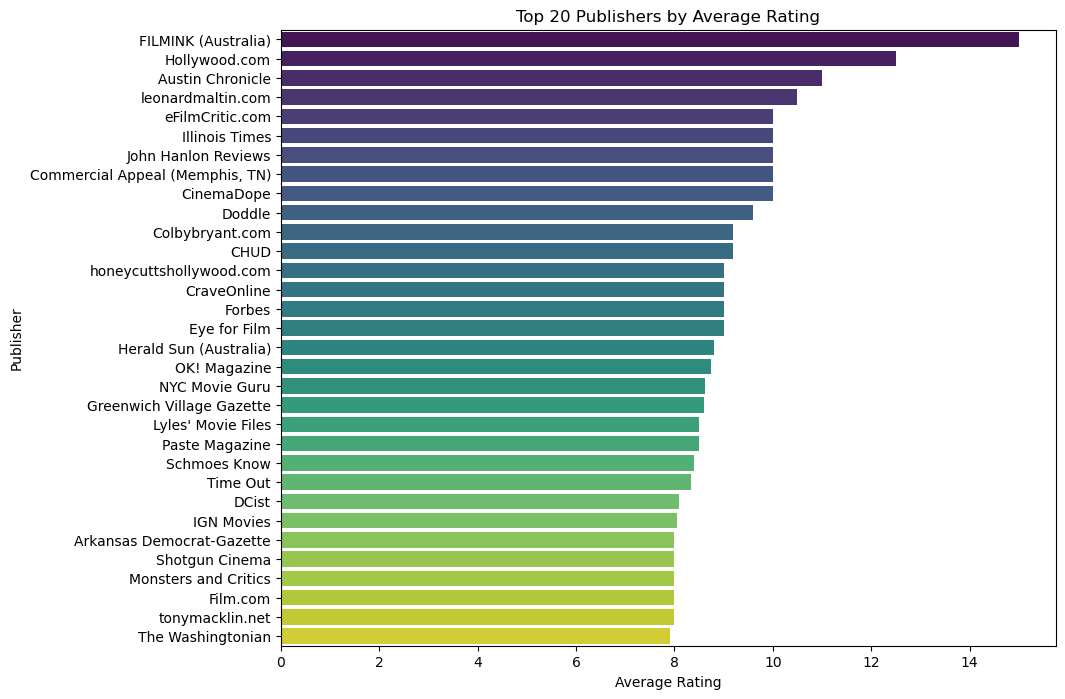

In [36]:
# Get the top 50 publishers by average rating
top_20_rating = publisher_ratings.nlargest(n=50)

# Convert the Series to a DataFrame for seaborn
top_20_df = top_20_rating.reset_index()

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='rating', y='publisher', data=top_20_df, ax=ax, palette='viridis')

# Set axis labels and title
plt.xlabel('Average Rating')
plt.ylabel('Publisher')
plt.title('Top 20 Publishers by Average Rating')
plt.show()

## tmdb.movies dataset

In [37]:
#checking for the top 200 most popular movies 
tmdb_movies=tmdb_movies.nlargest (n=50, columns='popularity')
tmdb_movies



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


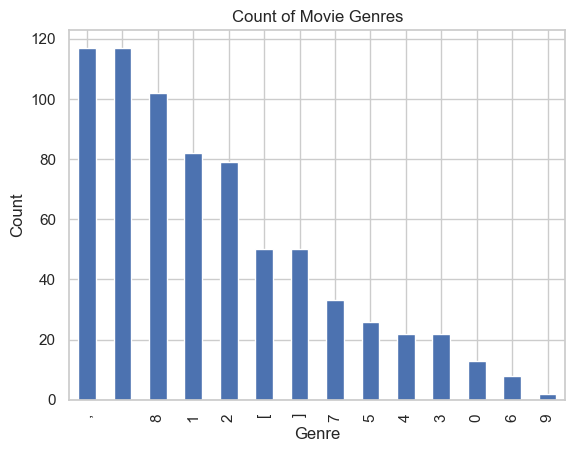

In [46]:
#plotting genre by vote_count
# Split genre_ids and explode
tmdb_movies =tmdb_movies.assign(genres=tmdb_movies.genre_ids.apply(lambda x: [str(g) for g in x])).explode('genres')

# Calculate genre counts
genre_counts = tmdb_movies['genres'].value_counts()

# Create a bar plot
genre_counts.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Count of Movie Genres")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


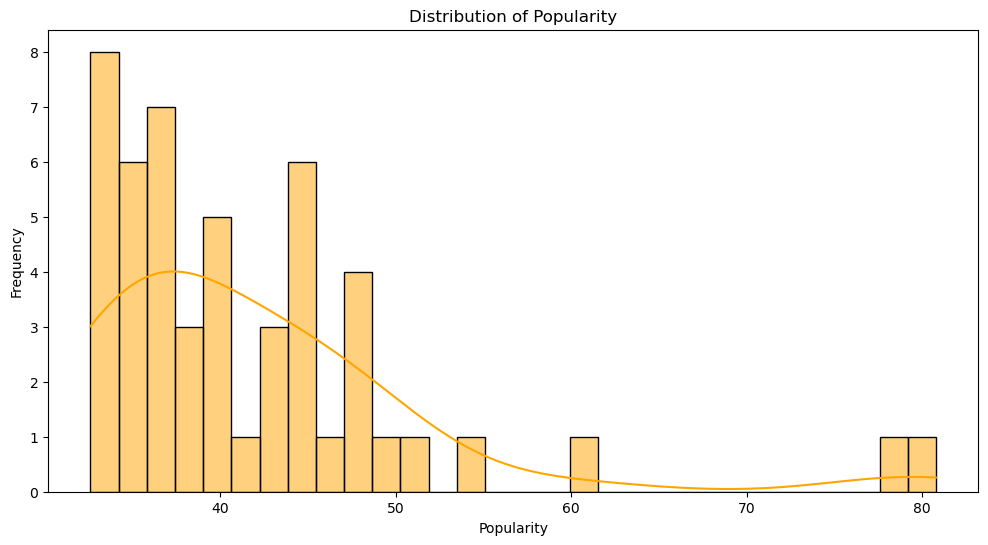

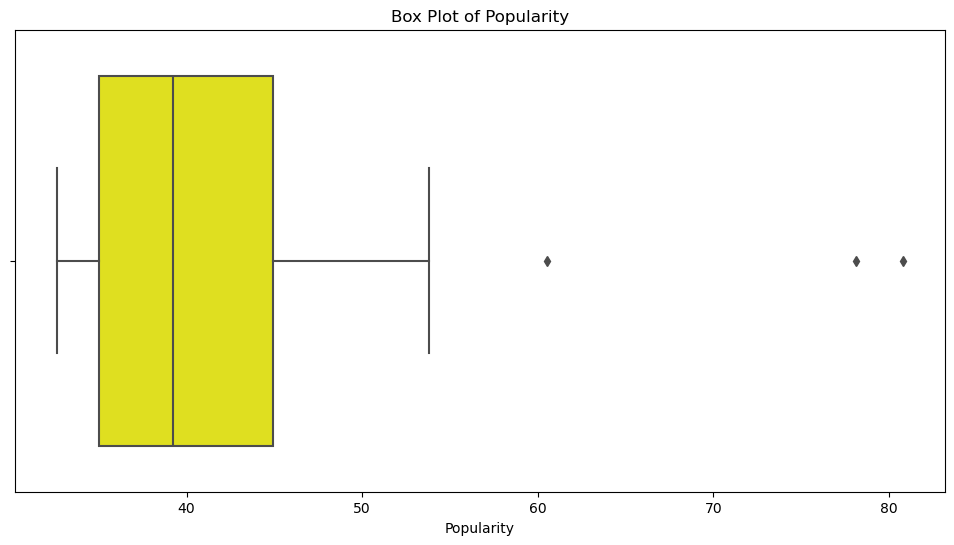

In [38]:
# checking the distribution of popularity 
#ploting a histogram
plt.figure(figsize=(12, 6))
sns.histplot(tmdb_movies['popularity'], bins=30, kde=True, color='orange')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

# Plot box plot for popularity using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x=tmdb_movies['popularity'], color='yellow')
plt.xlabel('Popularity')
plt.title('Box Plot of Popularity')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


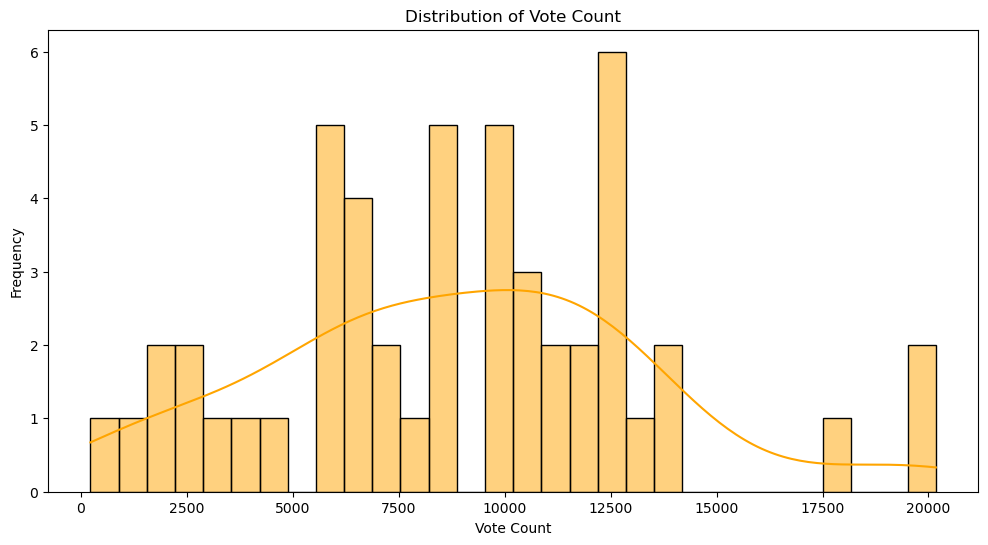

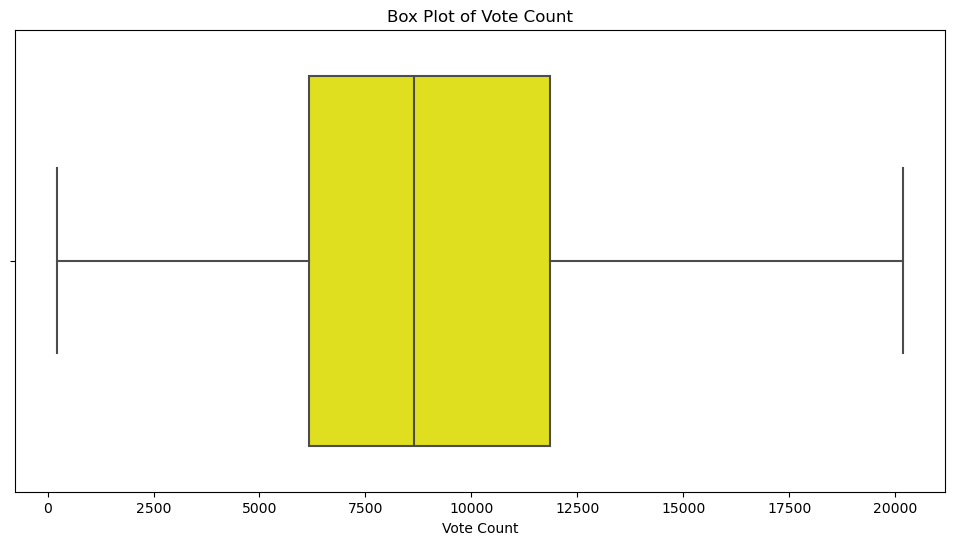

In [39]:
#checking the distribution of vote_count
# Plot histogram for vote_count using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(tmdb_movies['vote_count'], bins=30, kde=True, color='orange')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.title('Distribution of Vote Count')
plt.show()

# Plot box plot for vote_count using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x=tmdb_movies['vote_count'], color='yellow')
plt.xlabel('Vote Count')
plt.title('Box Plot of Vote Count')
plt.show()

       Unnamed: 0              genre_ids      id original_language  \
23811       23811           [12, 28, 14]  299536                en   
11019       11019               [28, 53]  245891                en   
23812       23812  [28, 12, 16, 878, 35]  324857                en   
11020       11020           [28, 12, 14]  122917                en   
5179         5179          [878, 28, 12]   24428                en   

                                  original_title  popularity release_date  \
23811                     Avengers: Infinity War      80.773   2018-04-27   
11019                                  John Wick      78.123   2014-10-24   
23812          Spider-Man: Into the Spider-Verse      60.534   2018-12-14   
11020  The Hobbit: The Battle of the Five Armies      53.783   2014-12-17   
5179                                The Avengers      50.289   2012-05-04   

                                           title  vote_average  vote_count  
23811                     Avengers: Inf

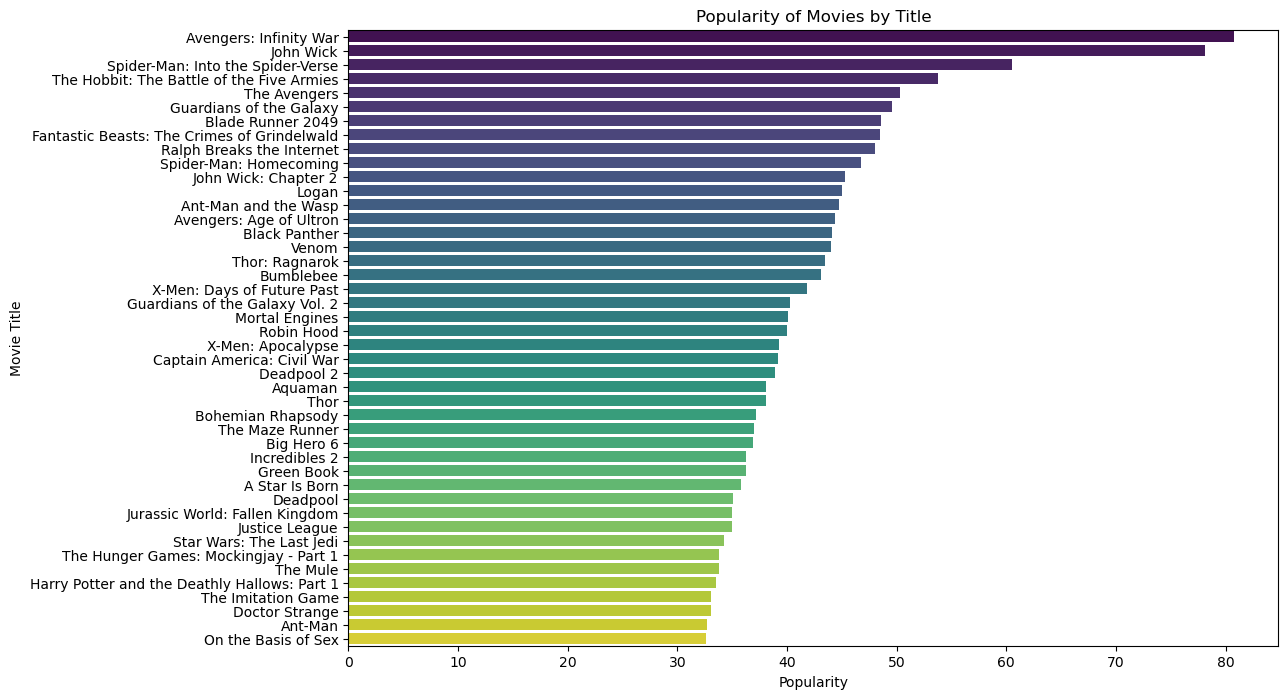

In [40]:
merged_data = pd.DataFrame(tmdb_movies)

# Check if data is loaded correctly
print(merged_data.head())

 #Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='popularity', y='title', data=merged_data, palette='viridis')
plt.title('Popularity of Movies by Title')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.show()

The action genre have the top 5 most popular movies, we, therefore, recommend the investor  produce movies from the action genre

## Doing a regression between production_budget and worldwide_gross from the movies _budget data set


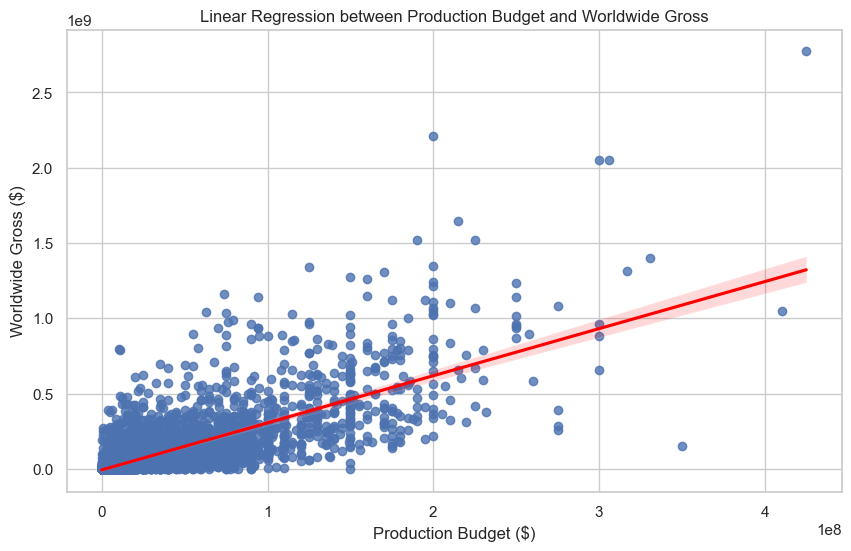

Slope: 3.126943380603299
Intercept: -7285667.054591805
R-squared: 0.5599618345695953
P-value: 0.0
Standard Error: 0.03646045274660644
Mean Squared Error: 1.343075151683004e+16


In [41]:
# Cleaning the data by removing dollar signs and commas, and converting to 64-bit integers
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype('int64')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype('int64')

# Performing linear regression
slope, intercept, r_value, p_value, std_err = linregress(tn_movie_budgets['production_budget'], tn_movie_budgets['worldwide_gross'])

# Predicting the worldwide gross using the regression model
predicted_gross = intercept + slope * tn_movie_budgets['production_budget']

# Calculating the Mean Squared Error
mse = mean_squared_error(tn_movie_budgets['worldwide_gross'], predicted_gross)

# Plotting the data and the regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn_movie_budgets, line_kws={"color": "red"})
plt.title('Linear Regression between Production Budget and Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()

# Printing the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")
print(f"Mean Squared Error: {mse}")

 A slope of 3.126 indicates that for every additional dollar spent on the production budget, the worldwide gross increases by approximately $3.13. This positive slope suggests a direct relationship between the production budget and the worldwide gross

The intercept represents the expected worldwide gross when the production budget is zero. In this case, it’s negative, which doesn’t have a practical interpretation in this context. It simply adjusts the regression line to fit the data.

The R-squared value indicates how well the regression line fits the data. Here, about 56% of the variability in the worldwide gross can be explained by the production budget. While this shows a moderate level of explanatory power, there are other factors influencing the worldwide gross not captured by this model.


Standard error  measures the average distance that the observed values fall from the regression line. A smaller standard error indicates that the data points are closer to the regression line, suggesting a more precise estimate of the slope.

Mean squared error: since the mse is very large it indicates that the model’s predictions are not very close to the actual values, suggesting that the model may not be very accurate